In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [14]:
df=pd.read_csv('heart.csv')


In [15]:
X=np.array(df.loc[:, df.columns != 'output'])
y=np.array(df['output'])

TRAIN TEST SPLIT

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [18]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

NEURAL NETWORK 

In [28]:
class NeuralNetwork:
    def __init__(self,LR,X_train,y_train,X_test,y_test):
        self.w=np.random.randn(X_train.shape[1])
        self.b=np.random.randn()
        self.L_train=[] #losses for training
        self.L_test=[] #losses for testing
        self.LR=LR
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
    
    def activation(self,x):
        #sigmoid activation
        return 1 / (1+np.exp(-x))
    
    def dactivation(self,x):
        #derivative of sigmoid
        return self.activation(x) * (1-self.activation(x))
    
    def forward(self,X):
        #forward pass
        hidden_1=np.dot(X,self.w) + self.b
        activate_1=self.activation(hidden_1)
        return activate_1
    
    def backward(self,X,y_true):
        #calculate gradients for backward pass
        hidden_1=np.dot(X,self.w) + self.b
        y_pred=self.forward(X)

        dL_dpred=2*(y_pred-y_true)
        dpred_dhidden1=self.dactivation(hidden_1)
        dhidden1_db=1
        dhidden1_dw=X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw

        return dL_db,dL_dw
    
    def optimizer(self,dL_db,dL_dw):
        #update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self,ITERATIONS):
        #train model
        for i in range(ITERATIONS):
            #random position
            random_pos=np.random.randint(len(self.X_train))

            #forward pass
            y_train_true=self.y_train[random_pos]
            y_train_pred=self.forward(self.X_train[random_pos])

            #calc training loss
            L=np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)

            #backward pass - calc gradients
            dL_db,dL_dw = self.backward(
                X=self.X_train[random_pos], y_true=self.y_train[random_pos]
            )

            #update weights
            self.optimizer(dL_db,dL_dw)

            #calc error at the end of each epoch
            L_sum=0
            for j in range(len(self.X_test)):
                y_true=self.y_test[j]
                y_pred=self.forward(self.X_test[j])
                L_sum += np.square(y_pred-y_true)
            self.L_test.append(L_sum)
        return "training completed successfully"



MODEL INSTANCE AND TRAINING

In [29]:
LR=0.1
ITERATIONS=1000

nn=NeuralNetwork(LR=LR, X_train=X_train_scale, y_train=y_train, X_test=X_test_scale,y_test=y_test) #initialize neural network
nn.train(ITERATIONS=ITERATIONS) #train Neural Network


'training completed successfully'

TEST DATA LOSS FUNCTION TREND OVER ITERATIONS

<AxesSubplot:>

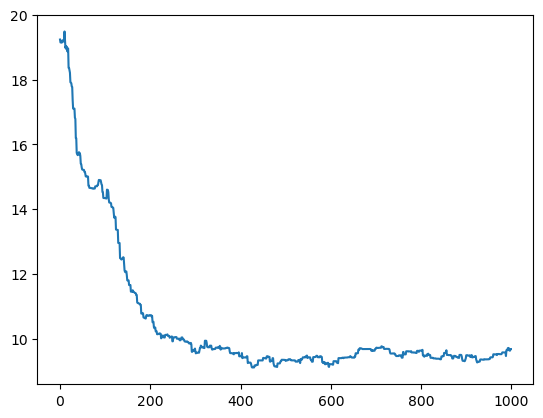

In [32]:
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)

MODEL ACCURACY

In [39]:
total=X_test_scale.shape[0]
correct=0
y_preds=[]
for i in range(total):
    y_true=y_test[i]
    y_pred=np.round(nn.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_pred == y_true else 0
acc=correct/total
print(acc)
confusion_matrix(y_true=y_test, y_pred=y_preds)

0.7868852459016393


array([[24,  6],
       [ 7, 24]], dtype=int64)